installing tools and weights

In [204]:
import json 
import os
from tqdm.auto import tqdm
from utils import web_cam, node_json, split_json, visualize, web_cam_photo
import gdown
# gdown.download('https://drive.google.com/uc?id=16_Ntdx-Wvn5Lf2F1MmcdGrPasNHwjkin', 
#                r'model\epoch 3-4200 weight.pt')
# gdown.download('https://drive.google.com/uc?id=1Znb_UM4PmlL-qXY5iBaU9hQcxeQC4OkI',
#                'model\checkpoint.tar')

creat folder & data

FINALE

In [279]:
ratio = 64 #每帧複製次數
interval = 1 #隔幾幀
datasetfolder = 'dataset'
length = 8
import numpy as np

datasetfolder = 'dataset'
word = '這是標準答案'
class_name = word
save_folder = os.path.join(datasetfolder, class_name)
input_video = os.path.join(save_folder, 'output.mp4')
input_json  = os.path.join(save_folder, 'nodes.json')
time_mark_path=os.path.join(save_folder, 'time mark.json')
output_folder = os.path.join(save_folder, 'output')
os.makedirs(save_folder, exist_ok=True)

web_cam(save_folder=save_folder, recording_time=length, break_time=2)
node_json(input_video, save_folder)
split_json(input_json,
           save_folder,
           time_mark_path,
           uniform_length=length*32)
json_path = os.path.join(save_folder,'segmented.json')
visualize(json_path, 192)

with open(json_path, 'r') as f:
    splited_json = json.load(f)
print(len(splited_json))
indices = [i for i in range(20)] + [(i+21) for i in range(20)]
data = np.array(splited_json)
x = data[:, indices, :]
container = np.zeros_like(x)
container[:,20:] = x[:,20:]
selected_data = container


output_path = os.path.join(save_folder, class_name)
os.makedirs(output_path, exist_ok=True)
for i, index in enumerate(range(0, len(splited_json), interval)):
    output_container = []

    for _ in range(ratio):
        output_container.append(selected_data[index].tolist())

    with open(os.path.join(output_path, f'{word}_output_data_{i}.json'), 'w') as file:
        json.dump(output_container, file,indent=4)

271 272
(211, 42, 2)
(256, 42, 2) (192, 42, 2)
256


# model

In [280]:
import torchvision
import torch
import os
from model.model import MAE
from utils import ViT, load_json
model_path = r'C:\Users\acnight\Documents\GitHub\SLPT\Project-SLPT\Sign_split\epoch-20weight.pt'
num_class = 23

datasetfolder = 'dataset'
class_name = word
save_folder = os.path.join(datasetfolder, class_name)
input_video = os.path.join(save_folder, 'output.mp4')
input_json  = os.path.join(save_folder, 'nodes.json')
time_mark_path=os.path.join(save_folder, 'time mark.json')
output_folder = os.path.join(save_folder, 'output')
os.makedirs(save_folder, exist_ok=True)
output_path = os.path.join(save_folder, class_name)

In [281]:
CHECKPOINT_PATH = 'checkpoint.tar'

checkpoint = torch.load(CHECKPOINT_PATH)
step = checkpoint['step']
mean = checkpoint['mean']
std = checkpoint['std']


vit = torchvision.models.vit_b_16(weights=None)
pretrained_model = MAE(vit, 64, 80)
model = ViT(pretrained_model, num_class = num_class)
model.load_state_dict(torch.load(model_path))
model = model.to('cuda')
model = model.eval()

In [282]:
prediction_list = [[] for _ in range(num_class)]
lable = []

for i in range(len(os.listdir(output_path))):
    path = os.path.join(output_path, f'{word}_output_data_{i}.json')
    x = load_json(path, 
                  mean=mean,
                  std=std,
                  augment=False).to('cuda')
    prediction = model(x)
    _, predicted_class = torch.max(prediction, 1)
    lable.append(predicted_class.detach())
    for i, item in enumerate(prediction.detach()[0].tolist()):
        prediction_list[i].append(item)

In [283]:
results = []
for i, item in enumerate(lable):
    #print(i, item.tolist()[0])
    results.append((i, item.tolist()[0]))
result_path = os.path.join(save_folder,'result.json')
print(results)
with open(result_path,'w') as f:
    json.dump(results,f,indent=4)

[(0, 15), (1, 18), (2, 15), (3, 15), (4, 18), (5, 18), (6, 15), (7, 18), (8, 18), (9, 18), (10, 18), (11, 15), (12, 15), (13, 15), (14, 15), (15, 18), (16, 18), (17, 18), (18, 15), (19, 15), (20, 15), (21, 15), (22, 15), (23, 15), (24, 15), (25, 15), (26, 15), (27, 15), (28, 15), (29, 18), (30, 15), (31, 15), (32, 18), (33, 18), (34, 18), (35, 18), (36, 18), (37, 15), (38, 15), (39, 15), (40, 15), (41, 15), (42, 15), (43, 15), (44, 15), (45, 18), (46, 18), (47, 15), (48, 15), (49, 15), (50, 15), (51, 15), (52, 15), (53, 15), (54, 15), (55, 15), (56, 15), (57, 15), (58, 15), (59, 15), (60, 18), (61, 18), (62, 18), (63, 18), (64, 18), (65, 9), (66, 9), (67, 9), (68, 9), (69, 18), (70, 18), (71, 18), (72, 18), (73, 18), (74, 18), (75, 3), (76, 3), (77, 3), (78, 3), (79, 3), (80, 3), (81, 3), (82, 3), (83, 3), (84, 18), (85, 18), (86, 18), (87, 18), (88, 18), (89, 18), (90, 18), (91, 18), (92, 18), (93, 18), (94, 18), (95, 18), (96, 18), (97, 18), (98, 18), (99, 18), (100, 18), (101, 18), 

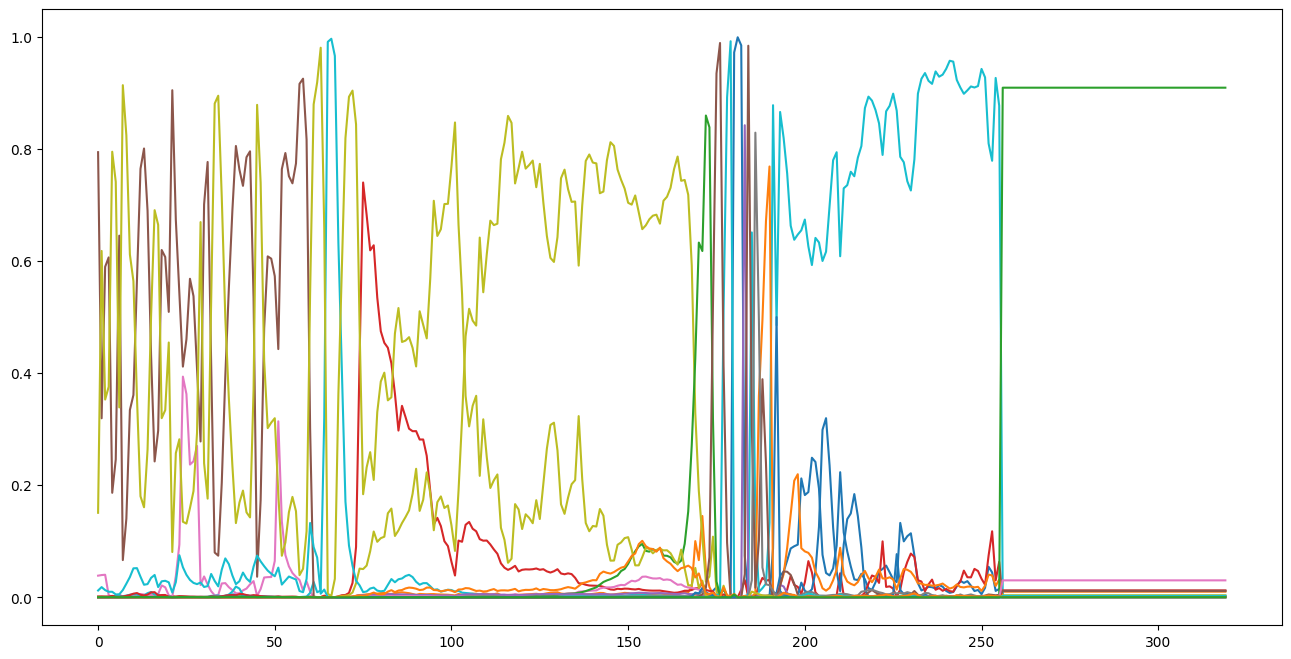

In [284]:
import matplotlib.pyplot as plt

# 创建一些示例数据
x = [i for i in range(len(prediction_list[0]))]

# 设置画布大小（单位：英寸）
plt.figure(figsize=(16, 8))

# 绘制折线图，并正确拼写 label 参数
for y in prediction_list:
    plt.plot(x, y, label='')
# 显示图表
plt.show()

In [285]:
from utils import visualize_slider
json_path = os.path.join(save_folder,'segmented.json')
visualize_slider(json_path, 256)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'Hand Key Points' in function 'cvGetTrackbarPos'
